In [1]:
import pandas as pd
import numpy as np
import os 

### Read the input and output of the simulator

##### Define the path to the folder of the outputs and the samples.csv
The outputs here are generated using ModularCirc Library (Tutorial_03)

In [18]:
out_path = '/Users/mfamili/work/ModularCirc/Tutorials/Tutorial_03/Outputs/Out_01'
in_path = '/Users/mfamili/work/ModularCirc/Tutorials/Tutorial_03/samples_Naghavi.csv'

In [19]:
parameters = pd.read_csv(in_path)
len(parameters)

1000

##### Read and process outputs
- Read the outputs and convert them to a list of dictionaries. report if any output files are missing
- convert outputs to a numpy array of (number of samples, number of outputs)

In [23]:
outputs = []
num_sim = 1000
no_sim_result_list = []
# Loop through the expected range of files
for i in range(num_sim):
    filename = f"all_outputs_{i}.csv"
    file_path = os.path.join(out_path, filename)
    
    if os.path.exists(file_path):  # Check if the file exists
        try:
            # Read the DataFrame and append it to the list
            df = pd.read_csv(file_path)
            outputs.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            outputs.append(False)  # Append False if there's an error
    else:
        no_sim_result_list.append(i)
        print(f"File {file_path} doesn't exist")
        outputs.append(False)  # Append False if the file doesn't exist

outs = np.array([df.max().values for df in outputs])
print(np.array(outs).shape)
print(np.array(outs).dtype)


(1000, 17)
float64


##### Update the parameters to drop the parameter sets where the output is missing

In [24]:
updated_parameters = parameters.drop(no_sim_result_list)
updated_parameters= updated_parameters.to_numpy()
updated_parameters.shape

(1000, 33)

##### Setup autoemulate 
- here we are choosing to preprocess the outputs in order to reduce the dimentionality


In [25]:
from autoemulate.compare import AutoEmulate
em = AutoEmulate()
em.setup(updated_parameters, outs, models=["gp"], preprocess_outputs=[])


,Values
Simulation input shape (X),"(1000, 33)"
Simulation output shape (y),"(1000, 17)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Do hyperparameter search (param_search),False
Reduce dimensionality (reduce_dim),False
Cross validator (cross_validator),KFold
Parallel jobs (n_jobs),1


In [26]:
best_model = em.compare()

Initializing:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
em.summarise_cv()

,model,short,rmse,r2
0,GaussianProcess,gp,44.04826,0.903202


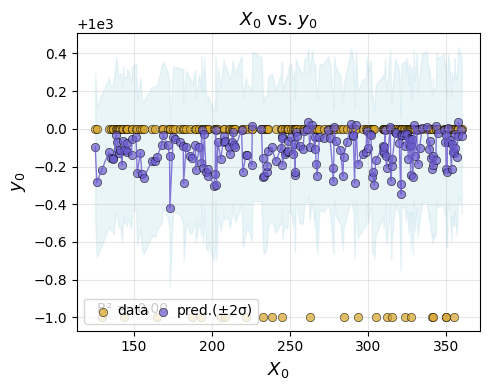

In [28]:
gp = em.get_model("GaussianProcess")
em.evaluate(gp)
em.plot_eval(gp)

Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


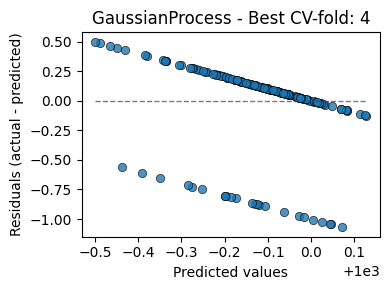

In [29]:
em.plot_cv(style="residual_vs_predicted")